In [3]:
import pandas as pd

In [2]:
pd.to_datetime('2018-01-05 3:45pm')

Timestamp('2018-01-05 15:45:00')

In [3]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [5]:
pd.to_datetime('7/8/1952', dayfirst = True)

Timestamp('1952-08-07 00:00:00')

In [4]:
data = pd.read_csv('opsd_germany_daily.csv')

In [5]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,1/1/2006,1069.184,NaN,NaN,NaN
1,1/2/2006,1380.521,NaN,NaN,NaN
2,1/3/2006,1442.533,NaN,NaN,NaN
3,1/4/2006,1457.217,NaN,NaN,NaN
4,1/5/2006,1477.131,NaN,NaN,NaN


In [6]:
data.shape

(4383, 5)

In [7]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data = data.set_index('Date')
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [10]:
data.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [11]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday_Name']= data.index.weekday_name

In [12]:
data.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [13]:
data.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday_Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [14]:
data.loc['2014-01-20' : '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
sns.set(rc={'figure.figsize': (11,4)})

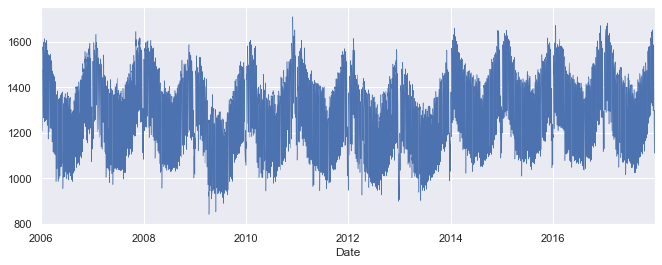

In [18]:
data['Consumption'].plot(linewidth=0.5)

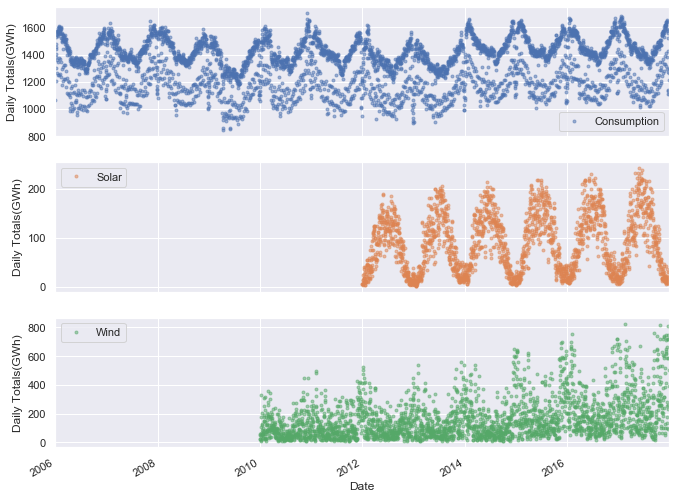

In [19]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker = '.', alpha =0.5, linestyle = 'None', figsize = (11,9), subplots = True)
for ax in axes:
    ax.set_ylabel('Daily Totals(GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

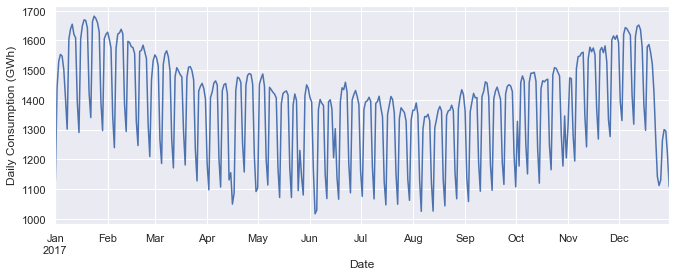

In [20]:
ax = data.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

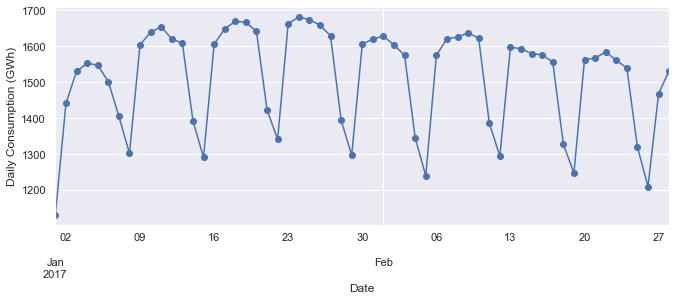

In [21]:
ax = data.loc['2017-01' : '2017-02', 'Consumption'].plot(marker = 'o', linestyle = '-')
ax.set_ylabel('Daily Consumption (GWh)')


In [34]:
fig, axes = plt.subplots(3,1, figsize = (11,10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    
    if ax != axes[-1]:
        ax.set_xlabel('')

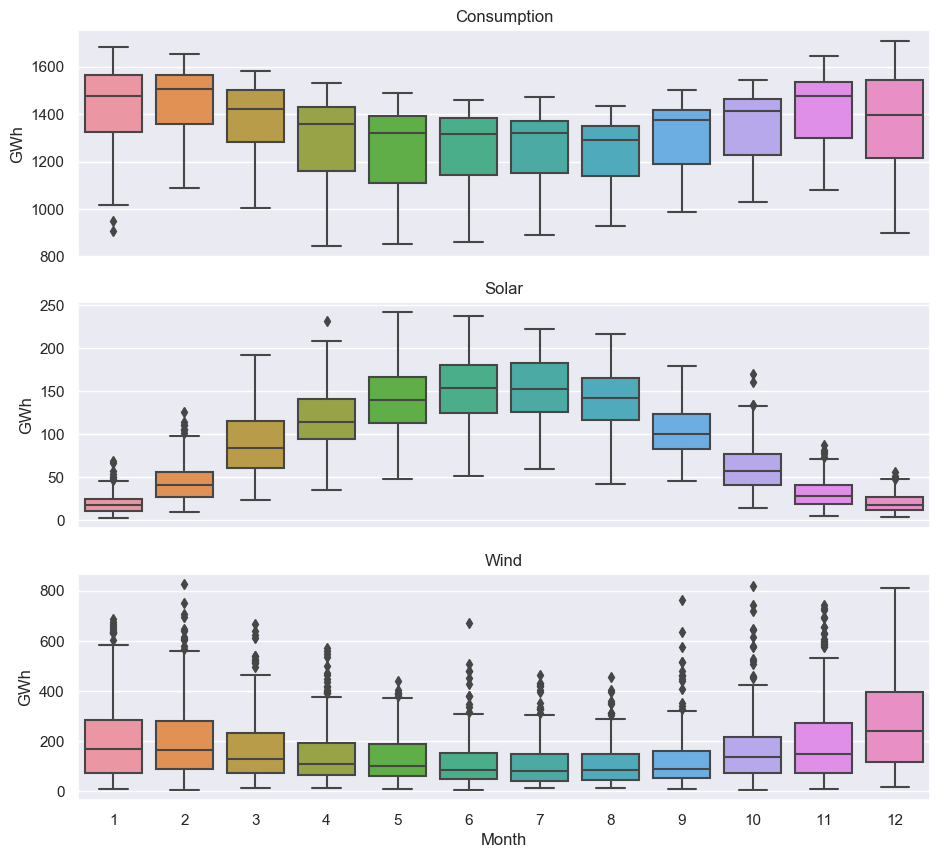

In [35]:
fig

In [37]:
plt.savefig('fig.png')

In [43]:
sns.boxplot(data=data, x='Weekday_Name', y='Consumption');

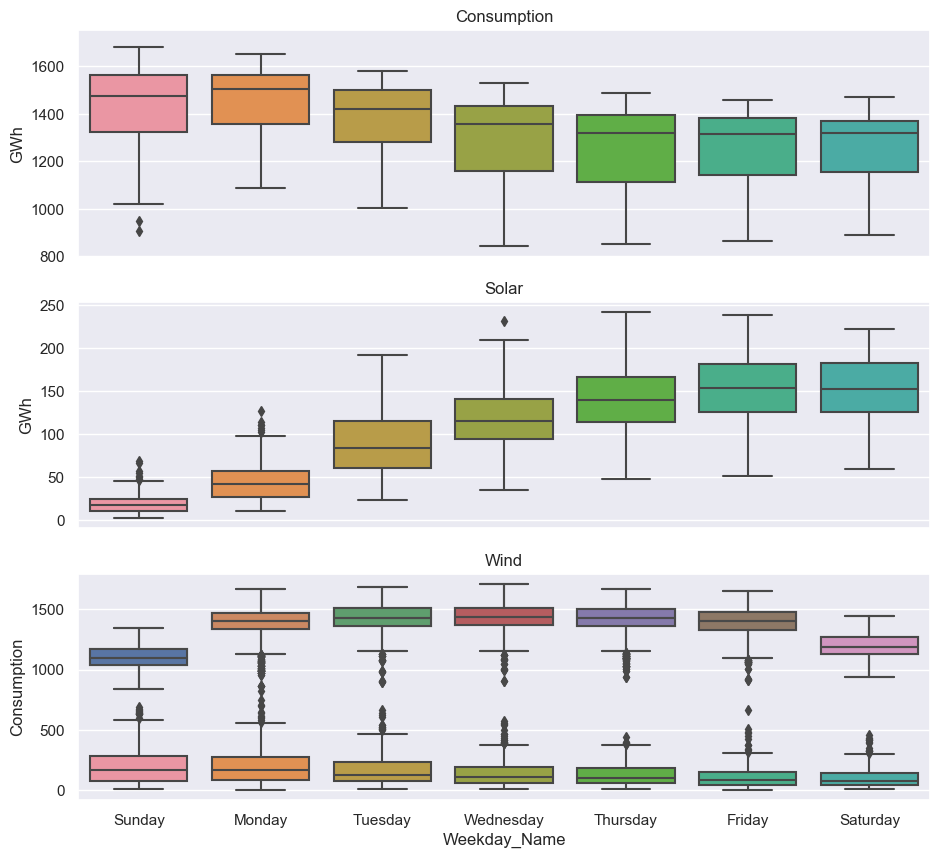

In [44]:
fig

In [45]:
data_cols = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_cols].resample('W').mean()

In [47]:
data_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [48]:
print(data.shape)
print(data_weekly_mean.shape)

(4383, 7)
(627, 4)


In [49]:
start, end = '2017-01', '2017-06'

In [51]:
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Solar'], marker = '.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'], marker ='o', linestyle='-', label= 'Weekly Mean Resample')
ax.set_ylabel('Solar Production(GWh)')
ax.legend();

In [52]:
data_monthly = data[data_cols].resample('M').sum(min_count=28)

In [54]:
data_monthly.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN
2006-04-30,38251.767,NaN,NaN,NaN
2006-05-31,38858.143,NaN,NaN,NaN


In [56]:
fig, ax = plt.subplots()
ax.plot(data_monthly['Consumption'], color='black', label='Consumption')
data_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

In [58]:
data_annual = data[data_cols].resample('A').sum(min_count=360)
data_annual =  data_annual.set_index(data_annual.index.year)
data_annual.index.name = 'Year'

In [59]:
data_annual['Wind+Solar/Consumption'] = data_annual['Wind+Solar']/data_annual['Consumption']
data_annual.tail(5)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


In [60]:
ax = data_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar share of Annual Electricity Consumption')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

In [ ]:
data_annual['Percent_Increase'] = data_annual

In [62]:
data_7d = data[data_cols].rolling(7, center = True).mean()
data_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


In [64]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize='8', linestyle='-', label='Weekly Mean Resample')
ax.plot(data_7d.loc[start:end,'Solar'], marker='.', linestyle='-', label='7-Day rolling mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [65]:
data_365 = data[data_cols].rolling(window=365, center=True, min_periods = 360).mean()

In [67]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(data_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(data_365['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

In [70]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(data_365[nm], label = nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0,400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')